In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df['Property_Area'].unique()



array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
mode = df['Loan_Amount_Term'].mode()[0]

In [7]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(mode)

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = pd.DataFrame(le.fit_transform(df['Gender']))
df['Gender'].astype('int32')

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int32

In [14]:
df.dtypes

Loan_ID               object
Gender                 int32
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
df['Married'] = pd.DataFrame(le.fit_transform(df['Married']))
df['Married'].astype('int32')
df['Education'] = pd.DataFrame(le.fit_transform(df['Education']))
df['Education'].astype('int32')
df['Self_Employed'] = pd.DataFrame(le.fit_transform(df['Self_Employed']))
df['Self_Employed'].astype('int32')
df['Property_Area'] = pd.DataFrame(le.fit_transform(df['Property_Area']))
df['Property_Area'].astype('int32')
df['Loan_Status'] = pd.DataFrame(le.fit_transform(df['Loan_Status']))
df['Loan_Status'].astype('int32')

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df['ApplicantIncome']=sc.fit_transform(df[['ApplicantIncome']])
df['LoanAmount']=sc.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=sc.fit_transform(df[['Loan_Amount_Term']])
df['CoapplicantIncome']=sc.fit_transform(df[['CoapplicantIncome']])

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.198860,0.74359,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


In [19]:
df.shape

(614, 13)

In [20]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
x = df.iloc[:,1:12]
y = df['Loan_Status']

In [22]:
#Some Values in the Dataset are '3+'
import re

dep = []

for i in range(0, len(x)):
    text = re.sub('[^0-3]','',x['Dependents'][i])
    print(text)
    dep.append(text)

0
1
0
0
0
2
0
3
2
1
2
2
2
0
2
0
1
0
0
0
0
1
0
2
1
0
0
2
0
2
1
0
1
0
3
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
1
2
0
0
1
2
0
3
0
1
0
0
0
1
3
0
0
2
0
3
3
0
0
1
3
3
0
1
2
0
1
0
2
0
0
0
0
2
2
0
0
0
0
0
0
0
2
0
0
0
0
1
2
0
2
3
0
0
0
1
0
1
0
1
0
0
0
0
0
2
0
0
3
0
1
0
0
0
0
0
0
3
0
2
0
2
2
0
0
0
2
0
2
1
0
0
0
0
0
2
0
3
1
1
0
0
0
0
1
2
0
0
0
0
0
2
0
3
3
0
0
0
2
3
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
2
3
1
2
0
0
0
0
0
0
3
1
3
0
3
0
0
2
2
0
2
0
0
0
0
0
2
0
0
1
0
0
0
1
1
0
0
1
1
2
1
0
2
0
0
2
1
1
0
0
2
0
1
0
3
0
3
0
3
1
0
1
0
0
0
2
3
0
1
0
0
0
0
2
1
0
0
0
0
1
0
2
0
0
0
0
0
0
0
0
2
2
0
0
3
1
1
0
1
0
0
0
1
0
0
0
0
0
2
0
0
0
2
0
1
2
0
1
1
0
3
2
0
3
1
0
0
0
0
1
0
0
0
1
0
1
2
3
0
3
0
1
3
2
0
0
2
0
0
0
0
3
0
0
0
2
1
0
3
1
2
0
0
0
0
0
0
1
0
0
2
2
1
0
0
3
0
0
2
0
0
0
0
2
1
0
0
0
0
3
3
0
2
2
2
0
0
0
0
2
0
0
0
0
0
0
0
1
3
1
0
0
0
0
0
1
2
0
0
0
0
0
1
0
0
1
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
3
1
0
1
2
0
2
1
2
2
0
0
0
2
0
0
2
0
0
3
0
1
0
0
3
0
2
0
1
1
3
0
2
2
2
2
1
2
0
3
0
0
2
1
2
1
2
0
0
1
0
0
0
1
0
0
1
0


In [23]:
x['Dep'] = pd.DataFrame(dep)

In [24]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dep
0,1,0,0,0,0,0.070489,0.000000,0.198860,0.743590,1.0,2,0
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.743590,1.0,0,1
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.743590,1.0,2,0
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.743590,1.0,2,0
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,0,0
610,1,1,3+,0,0,0.048930,0.000000,0.044863,0.358974,1.0,0,3
611,1,1,1,0,0,0.097984,0.005760,0.353111,0.743590,1.0,2,1
612,1,1,2,0,0,0.091936,0.000000,0.257598,0.743590,1.0,2,2


In [25]:
x = x.drop(['Dependents'],axis=1)

In [26]:
x['Dep'] = x['Dep'].astype('int32')

In [27]:
x.dtypes

Gender                 int32
Married                int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Dep                    int32
dtype: object

# Checking Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0d6d7c2c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0d6d95d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0d6d84cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0d6da2ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0d6da2fc8>],
 'means': []}

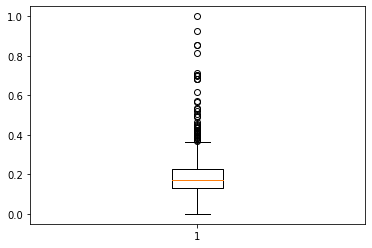

In [28]:
plt.boxplot(df['LoanAmount'])

# Feature Selection

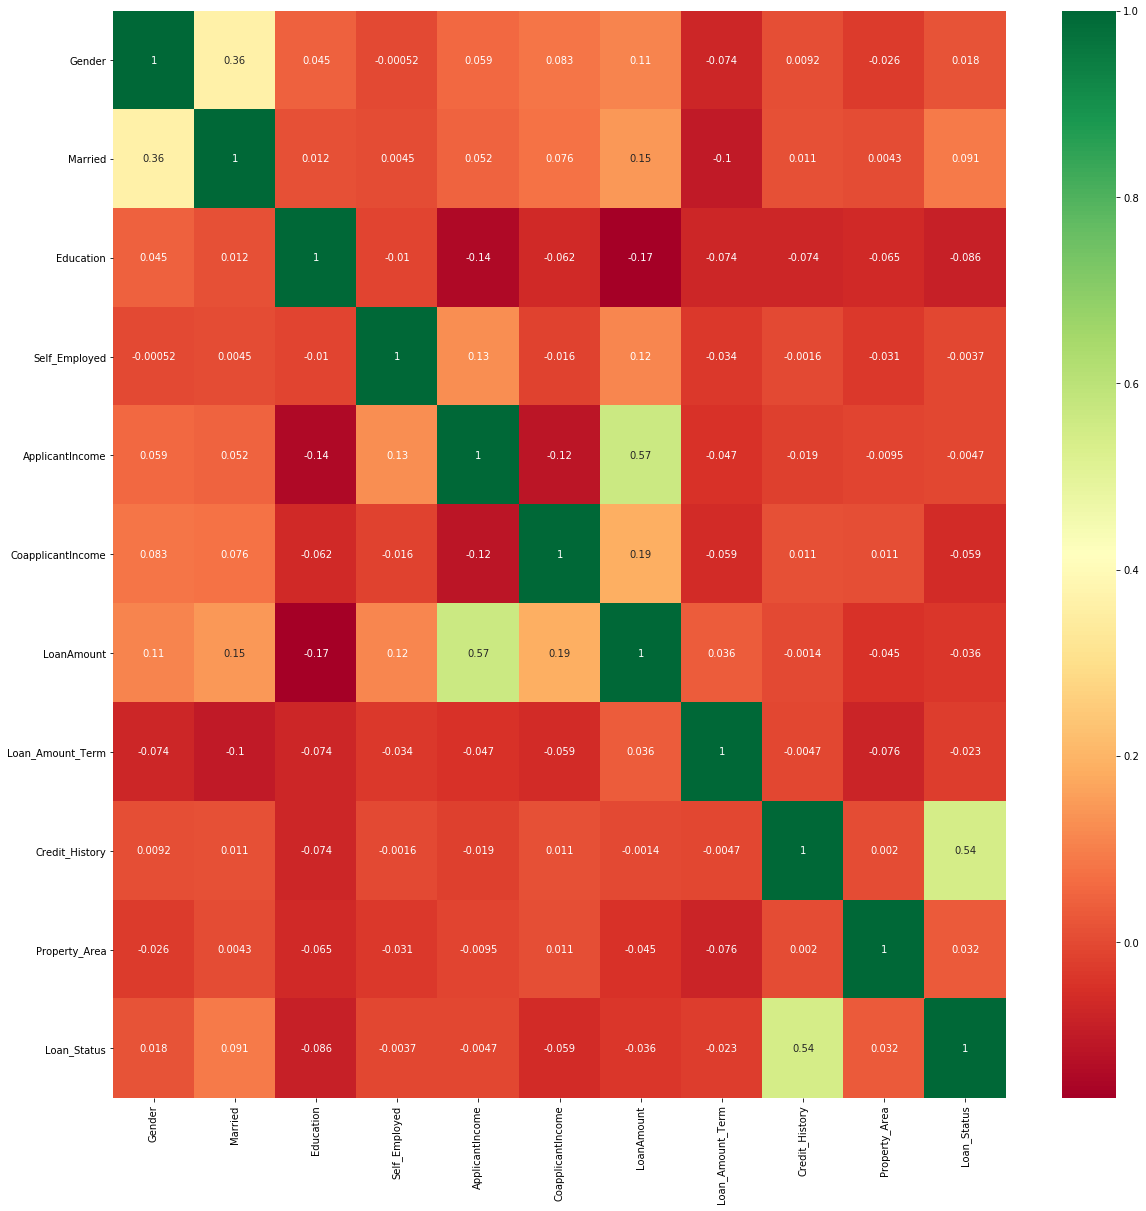

In [29]:
import seaborn as sns
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.827027027027027

In [35]:
#Perform Feature Selection Using Univariate Analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Specs','Score']

In [36]:
featureScores.nlargest(5, 'Score')

,Specs,Score
8,Credit_History,26.005877
2,Education,3.540502
1,Married,1.782425
9,Property_Area,0.377837
5,CoapplicantIncome,0.272207


In [37]:
#Now Select the 3 features to create a model
x = x[['Credit_History','Education','Married','Property_Area','CoapplicantIncome']]
x

,Credit_History,Education,Married,Property_Area,CoapplicantIncome
0,1.0,0,0,2,0.000000
1,1.0,0,1,0,0.036192
2,1.0,0,1,2,0.000000
3,1.0,1,1,2,0.056592
4,1.0,0,0,2,0.000000
...,...,...,...,...,...
609,1.0,0,0,0,0.000000
610,1.0,0,1,0,0.000000
611,1.0,0,1,2,0.005760
612,1.0,0,1,2,0.000000


In [38]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [65]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = model2.predict(x_test)

In [67]:
ac2 = accuracy_score(y_test, y_pred)
ac2

0.827027027027027

In [ ]:
import pickle
file_name = 'model.pkl'

In [43]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
y_pred = model3.predict(x_test)

# Using XgBoost

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [50]:
clf = XGBClassifier()

In [51]:
params_grid = {
     'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [53]:
random_search = RandomizedSearchCV(clf, param_distributions=params_grid, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [56]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [57]:
random_search.best_score_

0.7623854886083988

In [58]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [59]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
clfi = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clfi,x,y,cv=10)

In [63]:
score

array([0.80645161, 0.82258065, 0.77419355, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.83606557, 0.80327869, 0.83606557])

In [64]:
score.mean()

0.8079323109465891